# # SpringBoard Capstone2: Direct Marketing
## Unit20: Metrics
> Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data 

In [1]:
# pip install imbalanced-learn

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [4]:
market_pre = pd.read_csv('Market_explored.csv', index_col = 0)
print(market_pre.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
cat = market_pre[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
market_cat = pd.get_dummies(cat,drop_first = True)
print(market_cat.shape)
market_cat.head()

(22500, 43)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23986,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
20663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13958,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
market_num = market_pre[num]
market_all = market_cat.join(market_num)
market_all.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481
23986,0,0,0,0,0,0,1,0,0,0,...,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621
20663,1,0,0,0,0,0,0,0,0,0,...,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000
13958,0,1,0,0,0,0,0,0,0,0,...,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000
28184,0,0,0,0,0,0,0,0,0,0,...,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036


In [7]:
# do the procedures again
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
RF = RandomForestClassifier(n_estimators=1400,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 50,
 bootstrap = False)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [13]:
# Metrics calculation
#f1_macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print('f1_macro_random: ', f1_macro)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

f1_macro_random:  0.92615069067204
[[3744  184]
 [ 361 3140]]


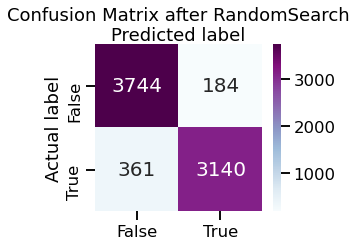

In [20]:
# Create heatmap from the confusion matrix
# Following commented line for powerpoint use
# sns.set_context("talk", font_scale=1)
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='g', annot_kws={"fontsize":20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix after RandomSearch')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

### exploring feature importance <br>
https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

[0.0272572  0.0029886  0.00246374 0.00601665 0.00325361 0.00241563
 0.00834179 0.00238442 0.01153983 0.00195785 0.00113692 0.03663961
 0.0187202  0.00159909 0.00345388 0.0149478  0.02270298 0.00089383
 0.00956044 0.01997499 0.00375847 0.01871006 0.00245946 0.00233962
 0.0179845  0.0022449  0.00830152 0.04401929 0.01788393 0.00102729
 0.02069443 0.00858716 0.00208348 0.05360634 0.02667613 0.00245571
 0.00176817 0.02091944 0.01272846 0.00953448 0.01086172 0.01246464
 0.00512023 0.0428603  0.10470751 0.0366565  0.03082277 0.01761453
 0.10765212 0.03025937 0.03284197 0.05284126 0.03926518]
53


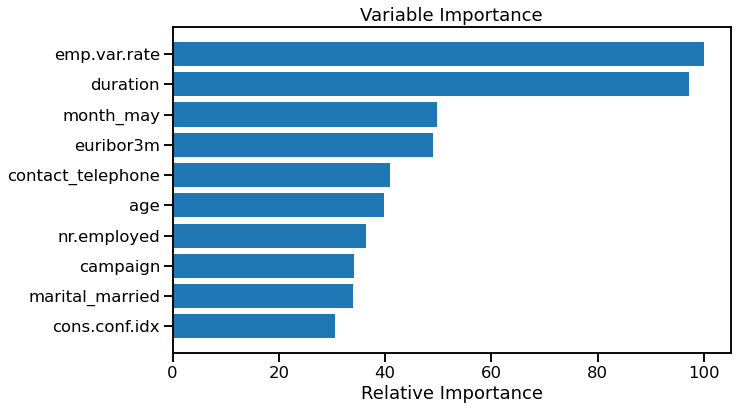

In [49]:
# Plot feature_importance
feature_importance = RF.feature_importances_
print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,6))
plt.barh(pos[-10:], feature_importance[sorted_idx][-10:], align='center')
plt.yticks(pos[-10:], X.columns[sorted_idx][-10:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

[0.0272572  0.0029886  0.00246374 0.00601665 0.00325361 0.00241563
 0.00834179 0.00238442 0.01153983 0.00195785 0.00113692 0.03663961
 0.0187202  0.00159909 0.00345388 0.0149478  0.02270298 0.00089383
 0.00956044 0.01997499 0.00375847 0.01871006 0.00245946 0.00233962
 0.0179845  0.0022449  0.00830152 0.04401929 0.01788393 0.00102729
 0.02069443 0.00858716 0.00208348 0.05360634 0.02667613 0.00245571
 0.00176817 0.02091944 0.01272846 0.00953448 0.01086172 0.01246464
 0.00512023 0.0428603  0.10470751 0.0366565  0.03082277 0.01761453
 0.10765212 0.03025937 0.03284197 0.05284126 0.03926518]
10


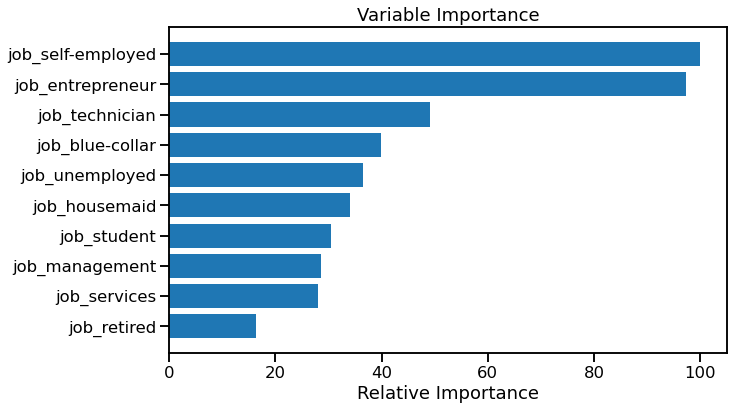

In [45]:
# Plot feature_importance for powerpoint use
feature_importance = RF.feature_importances_
print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[-10:]
sorted_idx = np.argsort(feature_importance)[-10:]

pos = np.arange(sorted_idx.shape[0])
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()